In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import subplots

In [11]:
data = pd.read_csv(r"C:\Users\spark lab\Downloads\heart.csv")

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [14]:
X = data.drop('target', axis=1)
y = data['target']

In [62]:
# Обучение модели случайного леса
rf_model = RandomForestClassifier(n_estimators=10,max_depth=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [63]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

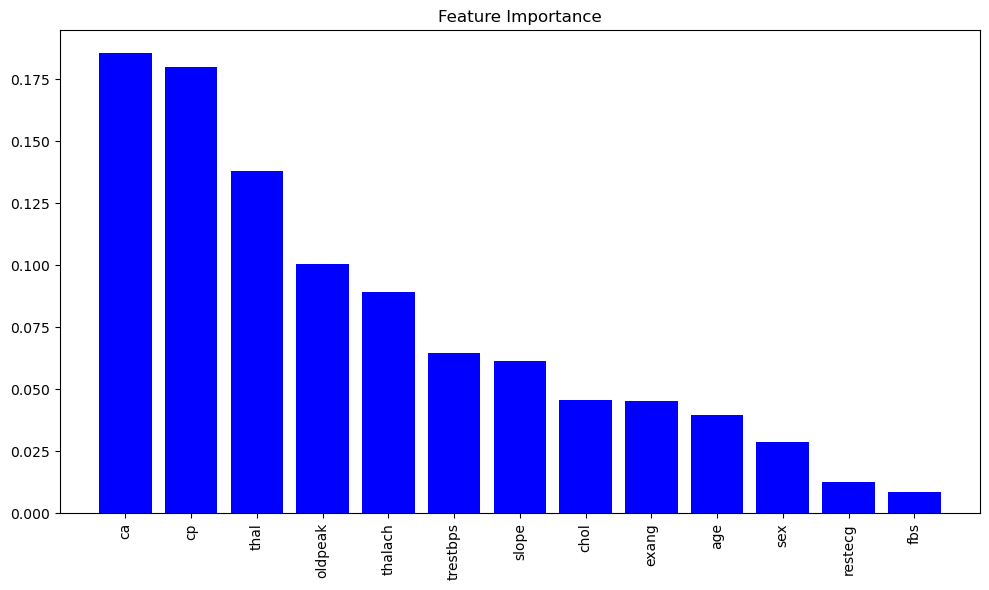

In [64]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.savefig('imp.png')
plt.show()

<Axes: >

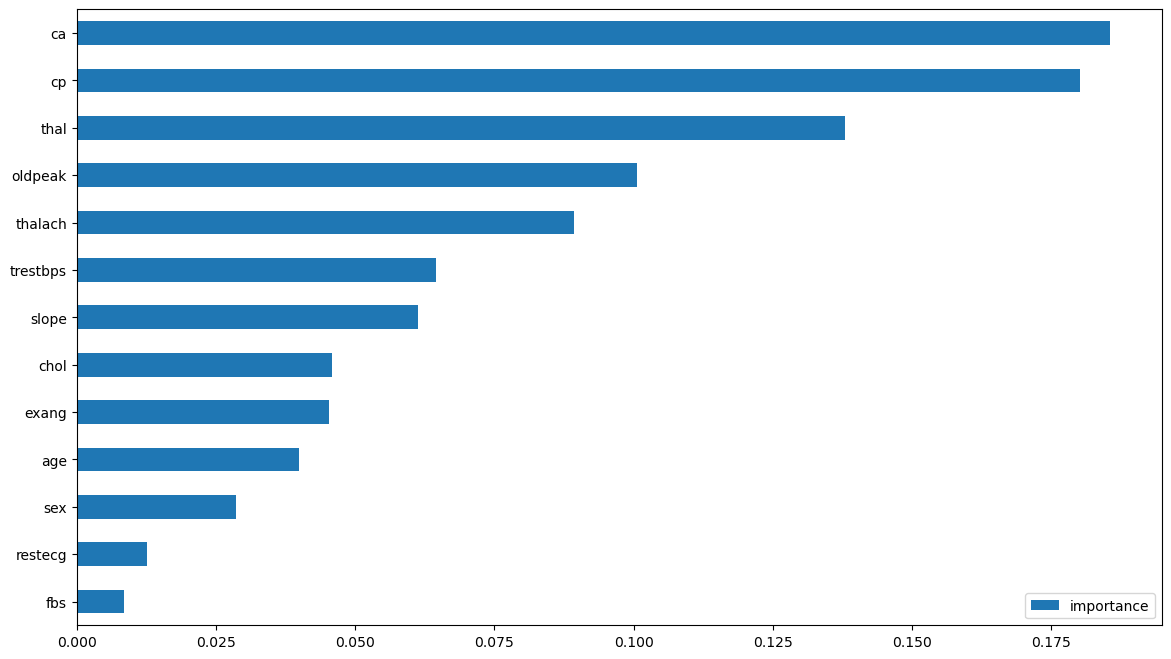

In [65]:
imp = pd.DataFrame(importances, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

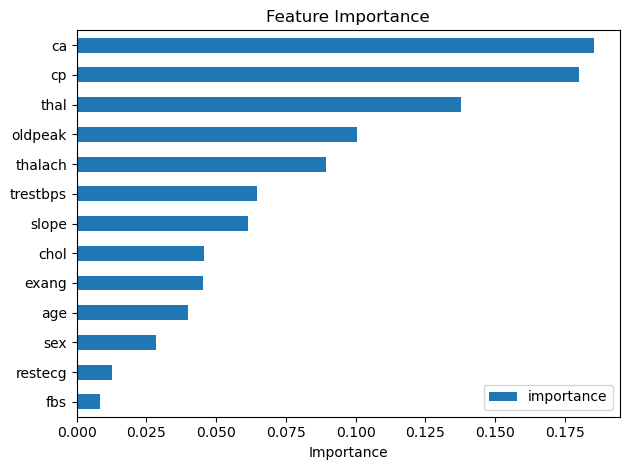

In [66]:
imp_sorted = imp.sort_values('importance')
plt.figure(figsize=(14, 8))
imp_sorted.plot(kind='barh')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()

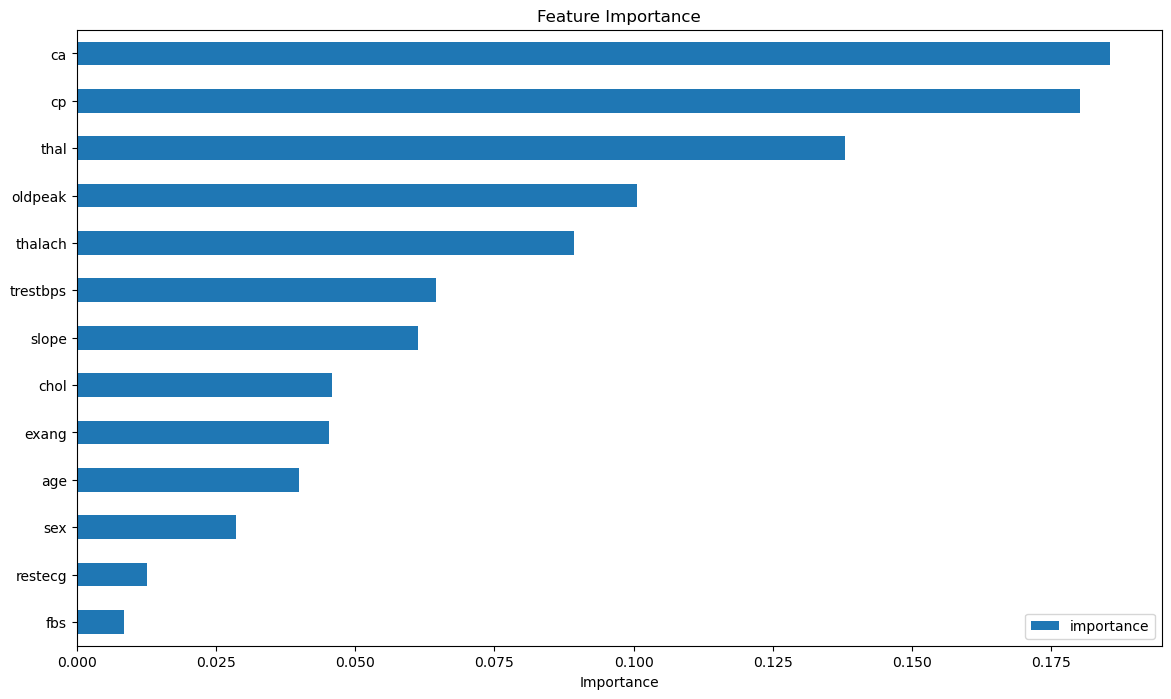

In [67]:
fig, ax = plt.subplots(figsize=(14, 8))
imp_sorted.plot(kind='barh', ax=ax)
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.savefig('feature_information.png')